In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
df_uv = pd.read_csv('USvideos.csv')
df_uv[['category_id']]

,category_id
0,22
1,24
2,23
3,24
4,24
...,...
40944,15
40945,22
40946,24
40947,1


In [3]:
# 储备式子
uv_list = []
i = 0
f = open('US_category_id.json','r')
a = json.load(f)
uv_id = df_uv['category_id'].value_counts().index
for id in uv_id:
    i = 0
    while i<= 31: 
        if int(a['items'][i]['id']) == id:
            uv_list.append(a['items'][i]['snippet']['title'])
        else: 
            pass
        i += 1  
uv_list
s = pd.Series(uv_list,index=df_uv['category_id'].value_counts().index)
s

24            Entertainment
10                    Music
26            Howto & Style
23                   Comedy
22           People & Blogs
25          News & Politics
28     Science & Technology
1          Film & Animation
17                   Sports
27                Education
15           Pets & Animals
20                   Gaming
19          Travel & Events
2          Autos & Vehicles
29    Nonprofits & Activism
43                    Shows
dtype: object

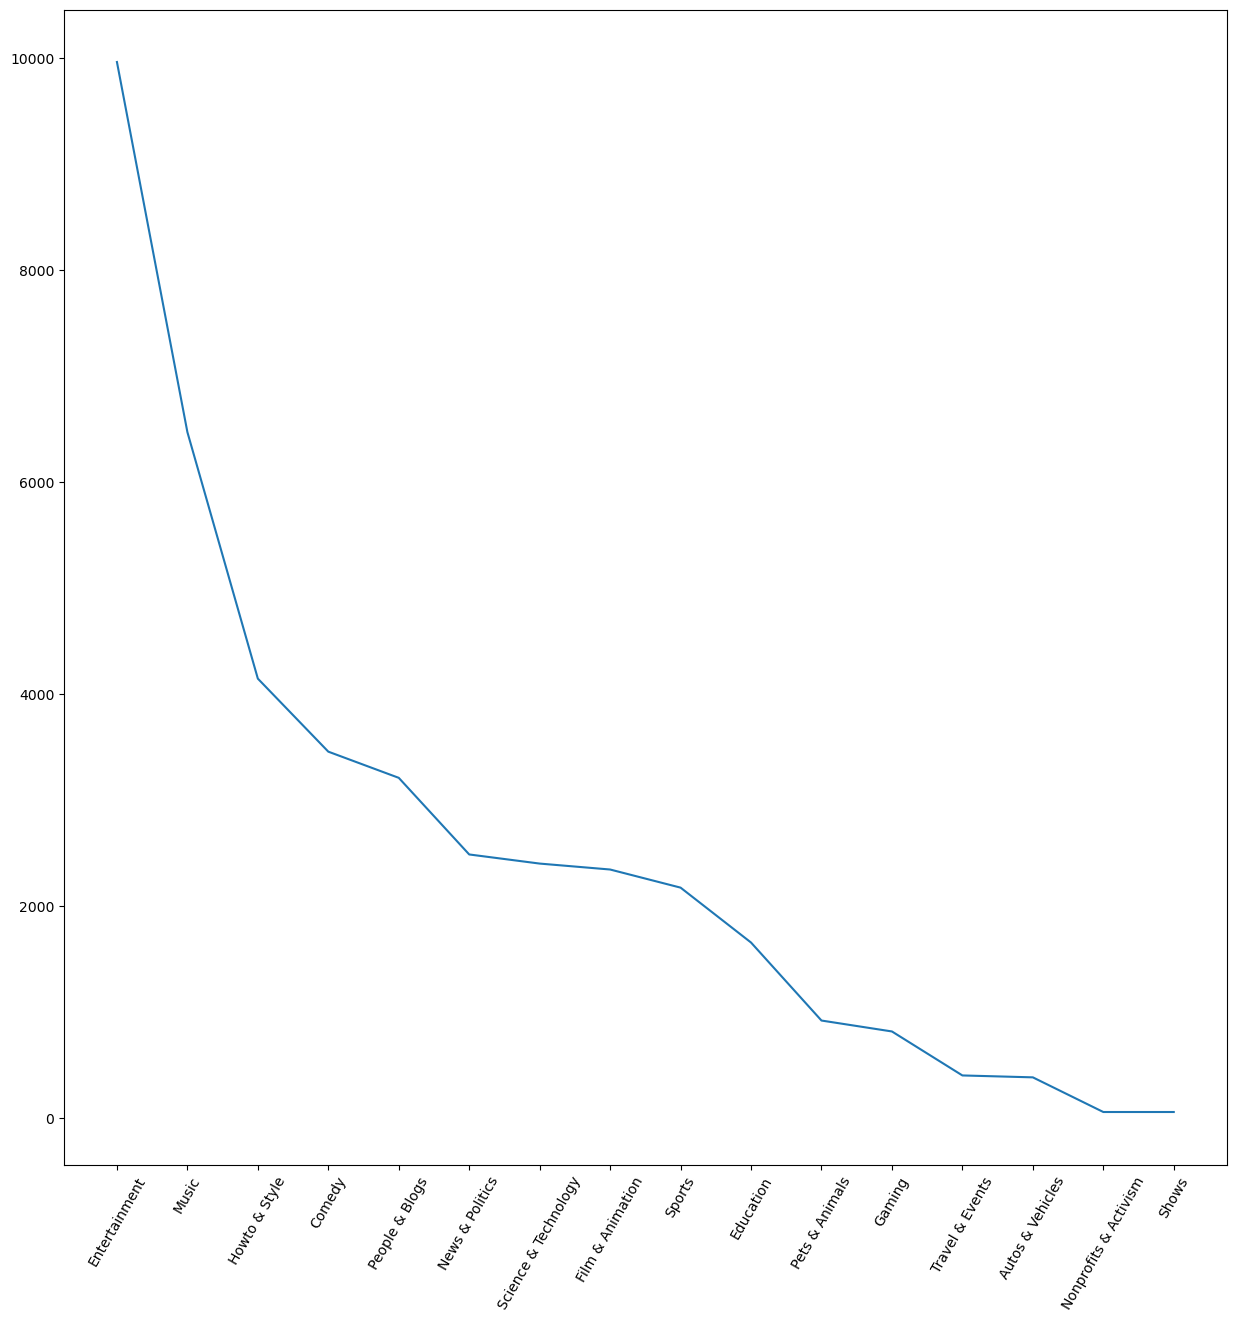

In [4]:
# 分类计算图(储备图)

uv_idnumber = []
for id in uv_id:
    uv_idnumber.append(df_uv['category_id'].value_counts()[id])
uv_idnumber
fig, ax = plt.subplots( figsize=(15, 15))
ax.plot(uv_list,uv_idnumber)
plt.xticks(rotation =60);


In [5]:
# 储备式子
m = []
for i in a['items']:
    m.append(i)
len(m)

32

In [6]:
# 点赞柱状图 -- 引出对作品质量的分析
from statistics import median
thumb_rate = df_uv['likes']/df_uv['views']
thumb_rate.mean()



0.03441297673088293

In [7]:
df_uv['thumb_rate'] = thumb_rate

In [8]:
df_uvthumbrate = df_uv.groupby('category_id')['thumb_rate'].mean().sort_values(ascending=False)

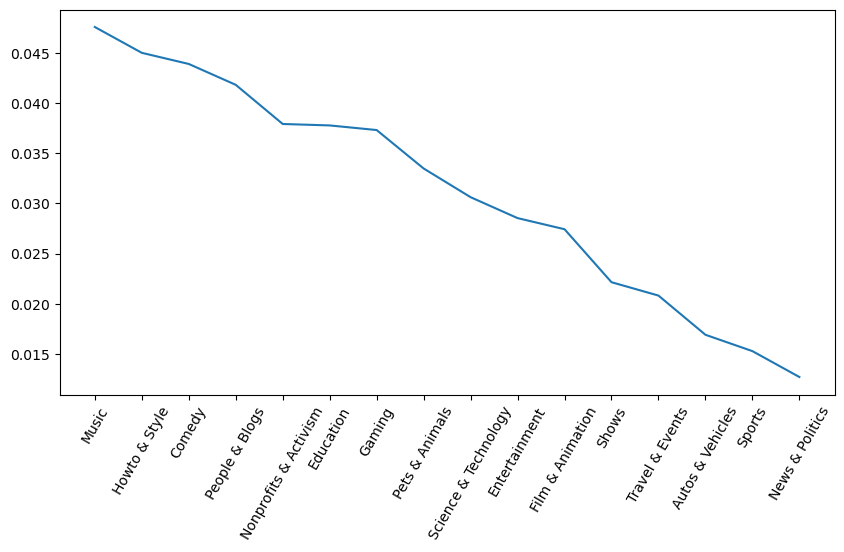

In [59]:
# 点赞率折线图 正序 （储备图）
uv_thumb_list = []
for id in df_uvthumbrate.index:
    i = 0
    while i<= 31: 
        if int(a['items'][i]['id']) == id:
            uv_thumb_list.append(a['items'][i]['snippet']['title'])
        else: 
            pass
        i += 1  
uv_thumb_number = []
for id in df_uvthumbrate.index:
    uv_thumb_number.append(df_uvthumbrate[id])
uv_thumb_number2 = []
for id in uv_id:
    uv_thumb_number2.append(df_uvthumbrate[id])
fig, ax = plt.subplots( figsize=(10, 5))
ax.plot(uv_thumb_list,uv_thumb_number)
plt.xticks(rotation =60);

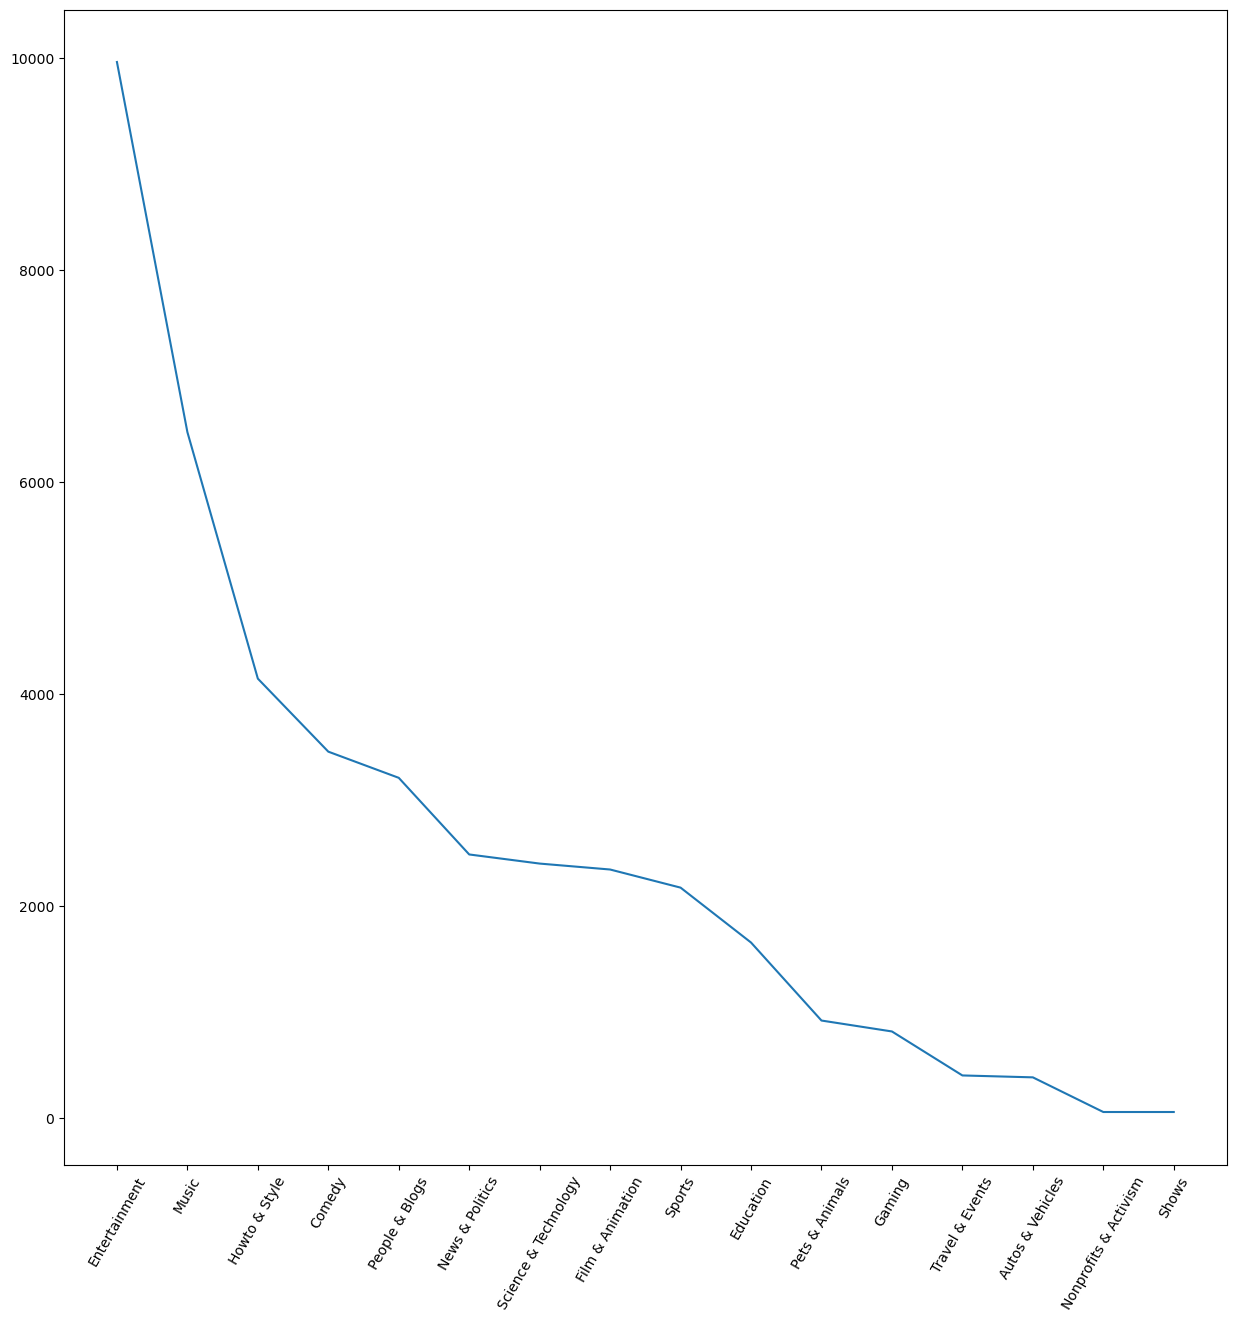

In [10]:
# 视频类别选择一览图 （储备图）
uv_idnumber = []
for id in uv_id:
    uv_idnumber.append(df_uv['category_id'].value_counts()[id])
uv_idnumber
fig, ax = plt.subplots( figsize=(15, 15))
ax.plot(uv_list,uv_idnumber)

plt.xticks(rotation =60);


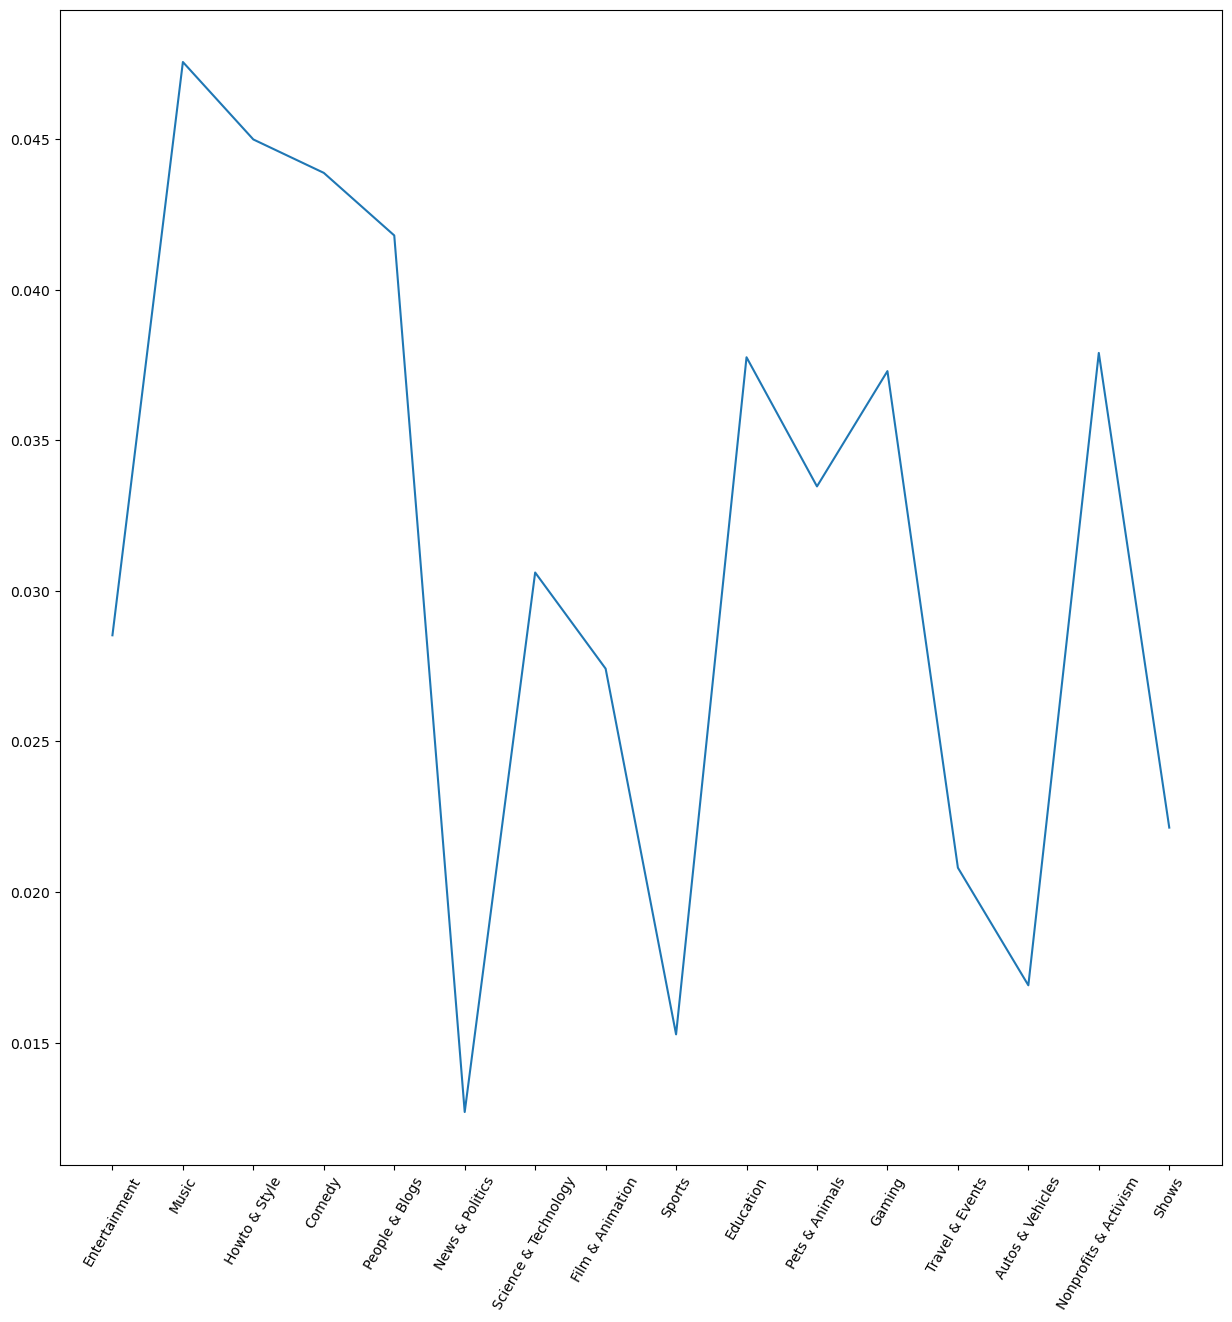

In [11]:
# 点赞图 -- 以种类为基辅，用来与视频类别选择进行对比（储备图）
df_uvthumbrate[10]
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(uv_list,uv_thumb_number2)
plt.xticks(rotation=60);

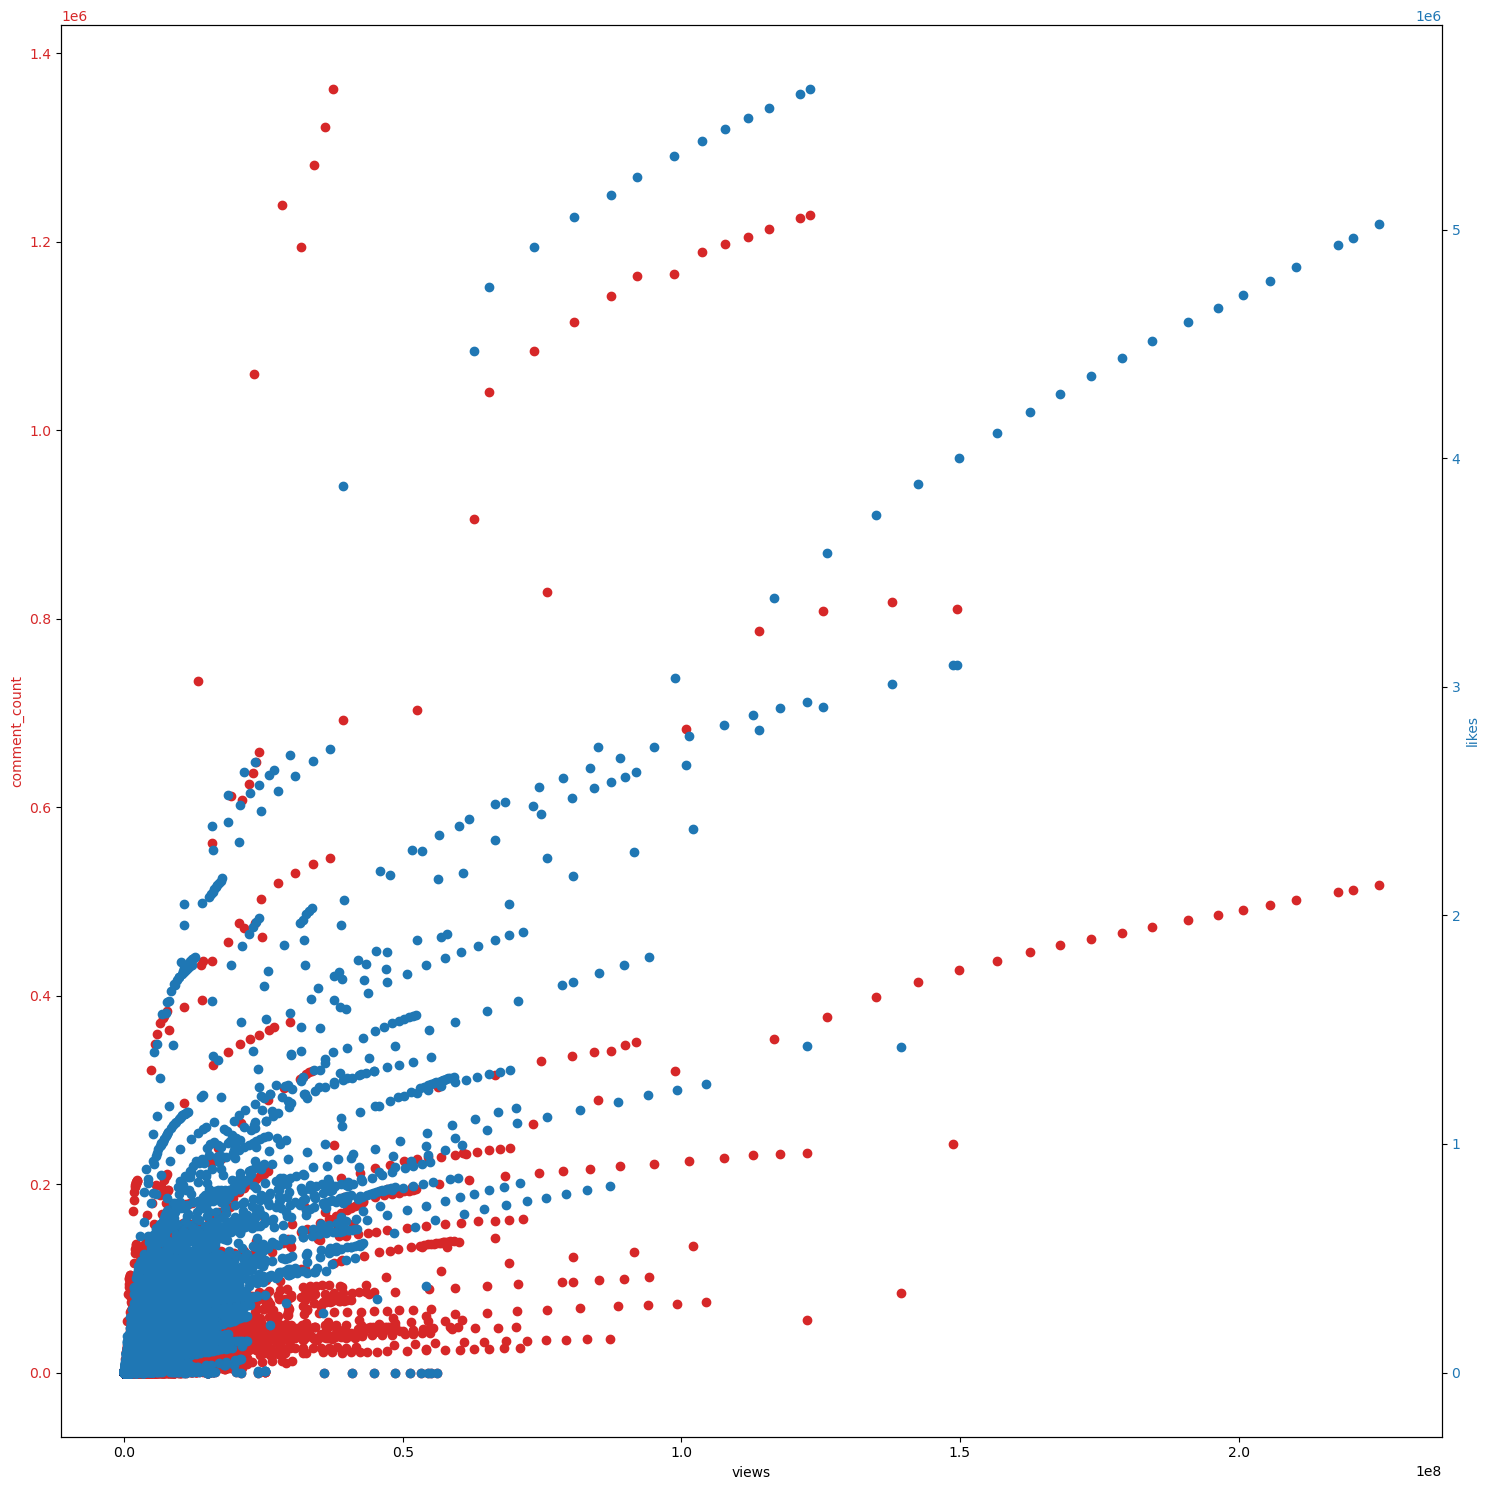

In [12]:
# 散点图 -- 先讲明likes 和 comment 在views情况下表示内容相联系
data1 = df_uv.comment_count
data2 = df_uv.likes

fig, ax1 = plt.subplots(figsize = (15, 15))

color = 'tab:red'
ax1.set_xlabel('views')
ax1.set_ylabel('comment_count', color=color)
ax1.scatter(df_uv.views, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # 创建共用x轴的第二个y轴

color = 'tab:blue'
ax2.set_ylabel('likes', color=color)
ax2.scatter(df_uv.views, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();

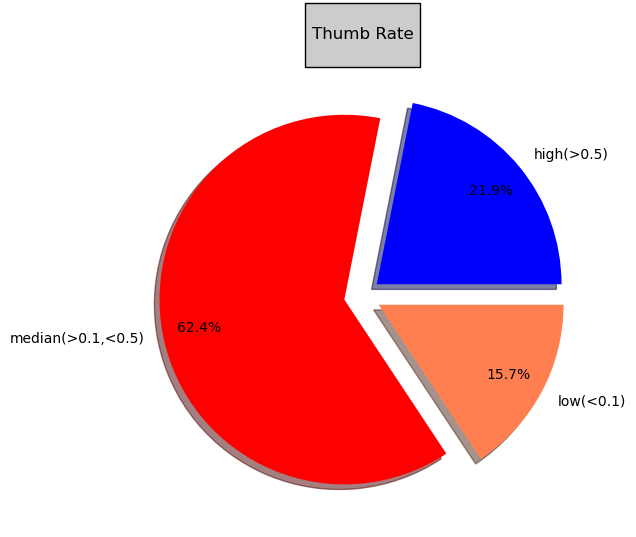

In [13]:
# 小正太分布柱状图 -- 点赞率对视频播放量举足轻重，理应列入加权（从差距入手）
# high >= 0.05
# 0.03 =< mideum <0.05
# low < 0.03
high = df_uv[thumb_rate>=0.05]
low = df_uv[thumb_rate<0.01]
median = df_uv[(thumb_rate<0.05)&(thumb_rate>=0.01)]
len(median)
sum = len(df_uv) 
p_h = len(high)/sum
p_m = len(median)/sum
p_l = len(low)/sum
x = ['high(>0.5)', 'median(>0.1,<0.5)', 'low(<0.1)']
y = [p_h,p_m,p_l]
 
# fig = plt.figure()
# plt.pie(y,labels=x,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
# plt.title("Pie chart")


def draw_pie(labels,quants):
    # make a square figure
    plt.figure(1, figsize=(6,6))
    # For China, make the piece explode a bit
    expl = [0.1,0.1,0.1]   #第二块即China离开圆心0.1
    # Colors used. Recycle if not enough.
    colors  = ["blue","red","coral"]  #设置颜色（循环显示）
    # Pie Plot
    # autopct: format of "percent" string;百分数格式
    plt.pie(quants, explode=expl, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
    plt.title('\nThumb Rate\n', bbox={'facecolor':'0.8', 'pad':5})
    plt.show()
    plt.savefig("pie.jpg")
    plt.close()
quants = y
labels = x

draw_pie(labels,quants)

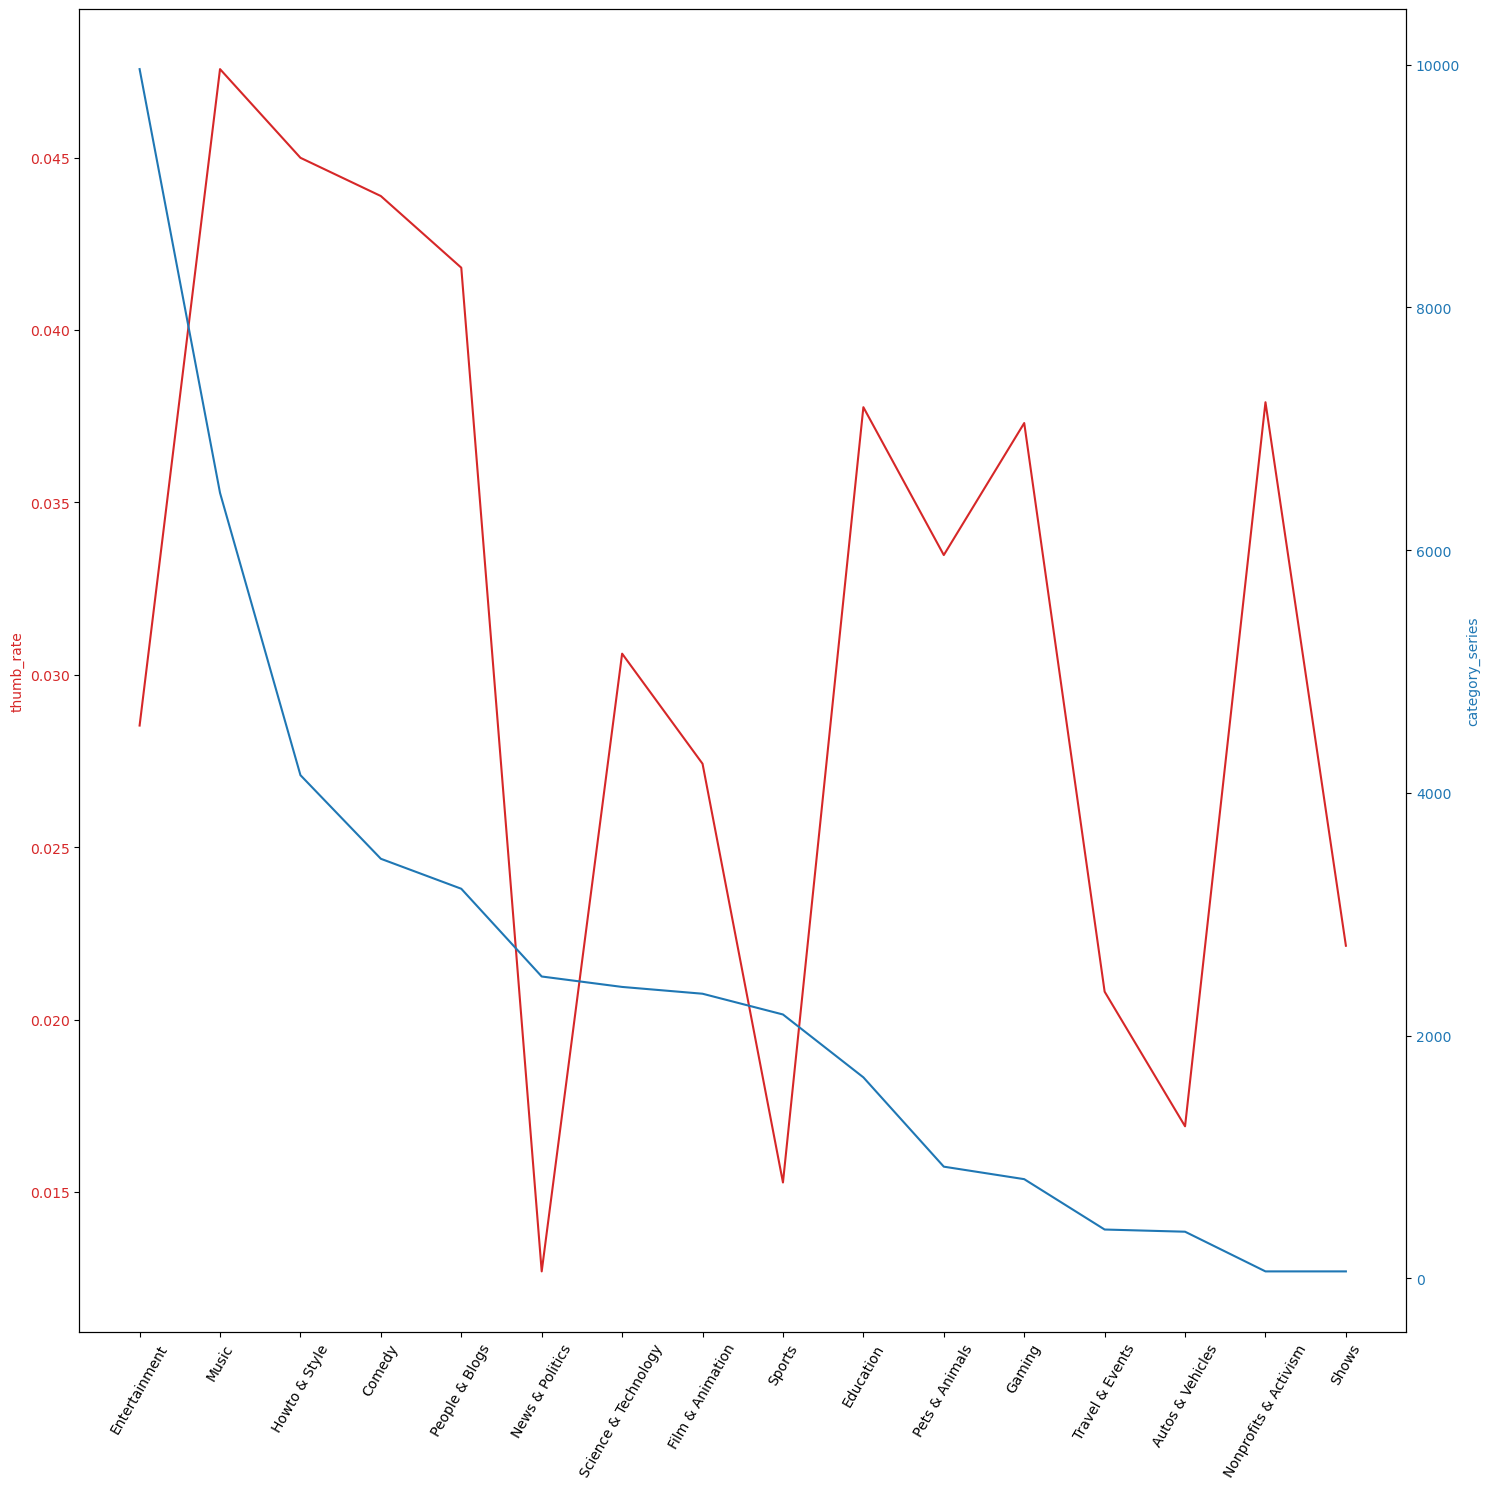

In [14]:
# 同轴折线图 -- 说明视频类别选择最高的不一定是点赞率最高的 引出接下来对加权的分析

data1 = uv_thumb_number2
data2 = uv_idnumber

fig, ax1 = plt.subplots(figsize = (15, 15))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('thumb_rate', color=color)
ax1.plot(uv_list, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 60)
ax2 = ax1.twinx()  # 创建共用x轴的第二个y轴

color = 'tab:blue'
ax2.set_ylabel('category_series', color=color)
ax2.plot(uv_list, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();



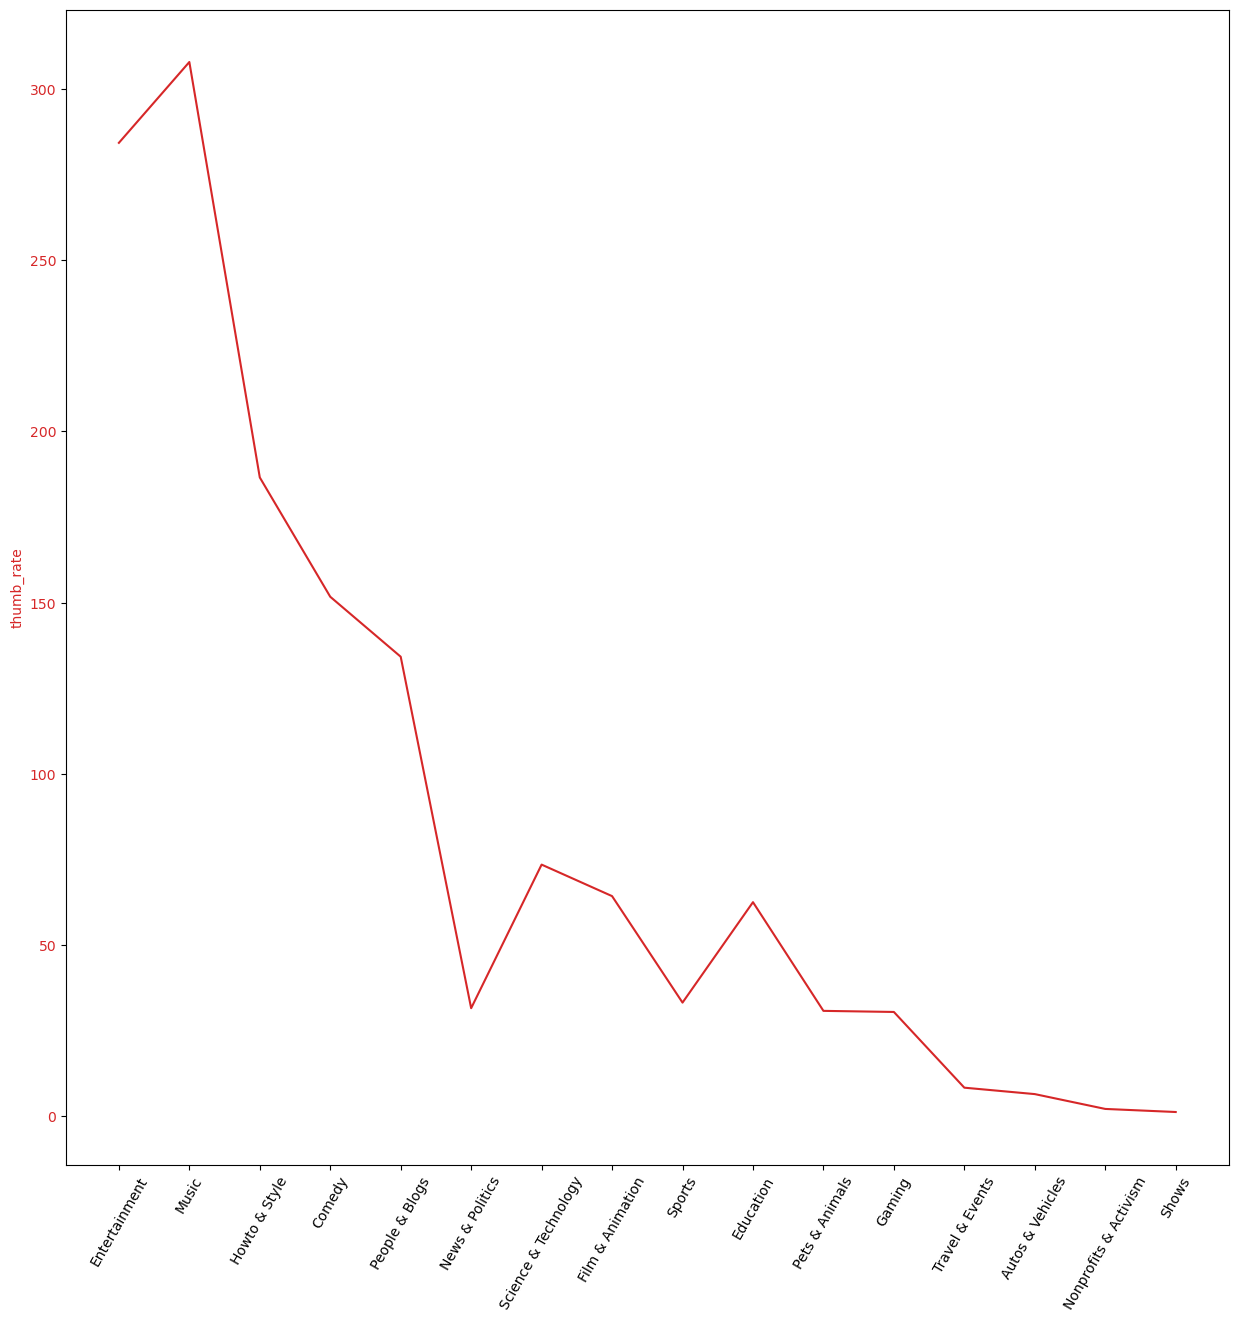

In [15]:
#未排序（储备图）

fig, ax1 = plt.subplots(figsize = (15, 15))
data3 = np.multiply(np.array(data1),np.array(data2))
color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('thumb_rate', color=color)
ax1.plot(uv_list, data3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 60);

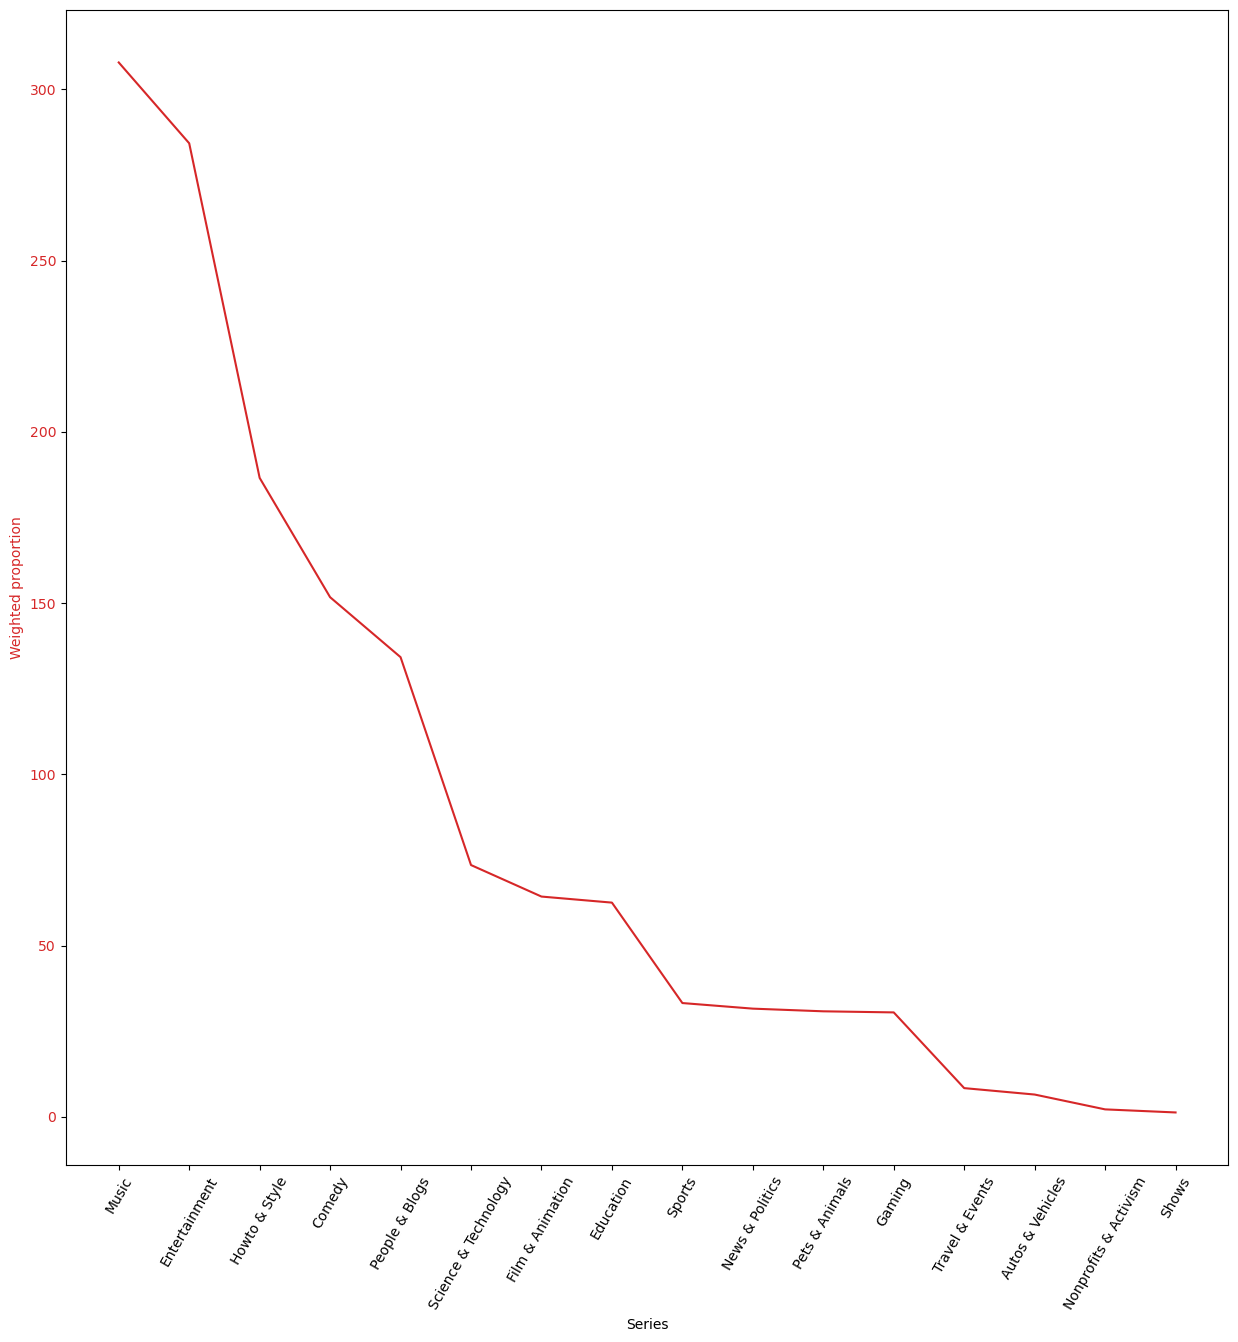

In [16]:
# 加权图 （用以商业结论）

s = pd.Series(data3,index=uv_list)
s_sort = s.sort_values(ascending=False)
fig, ax1 = plt.subplots(figsize = (15, 15))
color = 'tab:red'
ax1.set_xlabel('Series')
ax1.set_ylabel('Weighted proportion', color=color)
ax1.plot(s_sort.index, s[s_sort.index], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation = 60);

In [17]:
df = pd.read_csv('USvideos.csv')
uv_list = []
i = 0
f = open('US_category_id.json','r')
a = json.load(f)
uv_id = df['category_id'].value_counts().index
for id in uv_id:
    i = 0
    while i<= 31: 
        if int(a['items'][i]['id']) == id:
            uv_list.append(a['items'][i]['snippet']['title'])
        else: 
            pass
        i += 1  
id = {
    'id': uv_id,
    'Corresponding':uv_list,
}
dv_uv = pd.DataFrame(id)
print(dv_uv)

    id          Corresponding
0   24          Entertainment
1   10                  Music
2   26          Howto & Style
3   23                 Comedy
4   22         People & Blogs
5   25        News & Politics
6   28   Science & Technology
7    1       Film & Animation
8   17                 Sports
9   27              Education
10  15         Pets & Animals
11  20                 Gaming
12  19        Travel & Events
13   2       Autos & Vehicles
14  29  Nonprofits & Activism
15  43                  Shows


In [18]:
s_sort[s[s_sort.index]>=150]

Music            307.842456
Entertainment    284.240100
Howto & Style    186.541926
Comedy           151.705556
dtype: float64